# Assignment: Trees

## Do two questions in total: "Q1+Q2" or "Q1+Q3"

`! git clone https://github.com/ds3001f25/linear_models_assignment.git`

**Q1.** Please answer the following questions in your own words.
1. Why is the Gini a good loss function for categorical target variables?
2. Why do trees tend to overfit, and how can this tendency be constrained?
3. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.
4. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?
5. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

1. Gini is a good loss function because it measures how often a randomly chosen sample would be misclassified if it were categorized according to the distribution. So, calculating the lowest Gini value can help us select which split best predicts the target predictor.
2. Decisions tree tends to overfit because they can have an infinite number of branches/decision which can lead to highly specific rules that capture noise in the training data. To combat this issue, we can limit the number of branches the tree has, set a minimum leaf sample, or do pruning.
3. False, decision trees can also perform well on numerical/continuious variables by finding optimal split thresholds.  
4. Most versions of decision trees use binary splits because they make computations, interpretations, and pruning easier.
5. To determine if a tree is over or under fitting, we can compare the training and test accuracy. If there is a large deficit this may suggest overfitting, while a similar or low accuracy may be underfitting. Visually, an overfitted tree may have an excessive amount of branches.

**Q3.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv('corporate_ratings.csv')
df.head()


,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


In [66]:
df.shape # 31 variables, 2029 observations


(2029, 31)

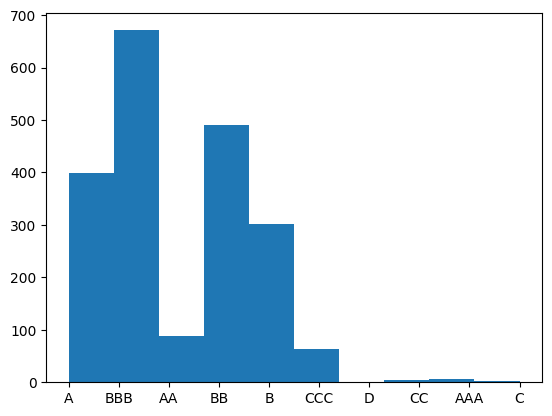

In [67]:
# Histogram of ratings
plt.hist(df['Rating'])
plt.show()

In [69]:
# Collapse all AAA/AA/A ratings into just A, and similarly for B and C
df['Rating'] = df['Rating'].replace(['AAA', 'AA', 'A'], 'A')
df['Rating'] = df['Rating'].replace(['BBB', 'BB', 'B'], 'B')
df['Rating'] = df['Rating'].replace(['CCC', 'CC', 'C'], 'C')
df.head()

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,B,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,B,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,B,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,B,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


In [81]:
# drop Date, Name, Symbol, and Rating Agency Name
df2 = df.drop(columns = ['Date', 'Name', 'Symbol', 'Rating Agency Name'])

# Sector, make a dummy/one-hot-encoded representation
df2 = pd.get_dummies(df2, columns = ['Sector'])

df2.head()

,Rating,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Consumer Durables,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,B,Consumer Durables,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,B,Consumer Durables,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,B,Consumer Durables,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,B,Consumer Durables,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


In [83]:
#Collect the relevant variables into a data matrix  X
y = df2['Rating']

X = df2.drop(columns = ['Rating'], axis=1)

In [84]:
from sklearn.model_selection import train_test_split
# Do a train/test split of the data and use a decision tree classifier to predict the bond rating.
# Including a min_samples_leaf constraint can raise the accuracy and speed up computation time.
# Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=104)

from sklearn import tree # Import the tree classifier
cart = tree.DecisionTreeClassifier(min_samples_leaf=5) # Create a classifier object
cart = cart.fit(X_train, y_train) # Fit the classifier

## Make Predictions on the Test Set:
y_hat = cart.predict(X_test)

## Confusion Matrix:
tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
acc = (tab.iloc[0,0]+tab.iloc[1,1])/len(y_test) # Compute Accuracy

print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

Accuracy:  0.6995073891625616 



col_0,A,B,C
Rating,,,
A,52,44,0
B,52,232,9
C,1,14,2


4. The model correctly predicts the rating 69.95% of the time. It is best at predicting the a true B rating since these are most frequent, while rarer A or C ratings are predicted less accurately. For instance, it predicted an A rating correctly just as many times as it falsely predicted a B rating to be an A. So, the model captures general trends but struggles with minority classes.

In [86]:
# If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?
df3 = df.drop(columns = ['Date', 'Name', 'Symbol'])
df3 = pd.get_dummies(df3, columns = ['Sector'])
df3 = pd.get_dummies(df3, columns = ['Rating Agency Name'])
df3.head()

,Rating,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,netProfitMargin,pretaxProfitMargin,grossProfitMargin,operatingProfitMargin,returnOnAssets,...,Sector_Health Care,Sector_Miscellaneous,Sector_Public Utilities,Sector_Technology,Sector_Transportation,Rating Agency Name_DBRS,Rating Agency Name_Egan-Jones Ratings Company,Rating Agency Name_Fitch Ratings,Rating Agency Name_Moody's Investors Service,Rating Agency Name_Standard & Poor's Ratings Services
0,A,0.945894,0.426395,0.099690,44.203245,0.037480,0.049351,0.176631,0.061510,0.041189,...,False,False,False,False,False,False,True,False,False,False
1,B,1.033559,0.498234,0.203120,38.991156,0.044062,0.048857,0.175715,0.066546,0.053204,...,False,False,False,False,False,False,True,False,False,False
2,B,0.963703,0.451505,0.122099,50.841385,0.032709,0.044334,0.170843,0.059783,0.032497,...,False,False,False,False,False,False,False,True,False,False
3,B,1.019851,0.510402,0.176116,41.161738,0.020894,-0.012858,0.138059,0.042430,0.025690,...,False,False,False,False,False,False,False,True,False,False
4,B,0.957844,0.495432,0.141608,47.761126,0.042861,0.053770,0.177720,0.065354,0.046363,...,False,False,False,False,False,False,False,False,False,True


In [87]:
y = df3['Rating']

X = df3.drop(columns = ['Rating'], axis=1)

In [88]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=104)

from sklearn import tree # Import the tree classifier
cart = tree.DecisionTreeClassifier(min_samples_leaf=5) # Create a classifier object
cart = cart.fit(X_train, y_train) # Fit the classifier

## Make Predictions on the Test Set:
y_hat = cart.predict(X_test)

## Confusion Matrix:
tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
acc = (tab.iloc[0,0]+tab.iloc[1,1])/len(y_test) # Compute Accuracy

print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

Accuracy:  0.7192118226600985 



col_0,A,B,C
Rating,,,
A,53,43,0
B,51,239,3
C,0,16,1


5. After adding Agency Name as a predictor, accuracy increases slightly from 69.95% to 71.92%. This increase suggests that the rating agency has influence over the bond rating beyond business fundamentals, perhaps one agency is stricting in giving ratings while another is more lenient.